# Lecture02

## Alternative regression models

### CIS432 Machine Learning for Business Analytics


In [ ]:
# Generate a toy dataset
import numpy as np
np.random.seed(1)                  # for reproducability
n = 5                              # the number of observations
x = 2*np.random.rand(n,1)          # generate n random samples between 0-2
y = 4 + 3*x + np.random.randn(n,1) # generate n corresponding values according to the linear function 4 + 3x + random noise

In [ ]:
# train multiple linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR
linReg = LinearRegression().fit(x.reshape(-1,1), y.reshape(-1))
ridge = Ridge().fit(x.reshape(-1,1), y.reshape(-1))
lasso = Lasso().fit(x.reshape(-1,1), y.reshape(-1))
svr = LinearSVR().fit(x.reshape(-1,1), y.reshape(-1))

In [ ]:
# print coefficients
linReg_coeff = np.array([linReg.intercept_, linReg.coef_[0]])
ridge_coeff = np.array([ridge.intercept_, ridge.coef_[0]])
lasso_coeff = np.array([lasso.intercept_, lasso.coef_[0]])
svr_coeff = np.array([svr.intercept_[0], svr.coef_[0]])

import pandas as pd
print(pd.DataFrame([linReg_coeff, ridge_coeff, lasso_coeff, svr_coeff], columns=['beta_0','beta_1'], index=['Lin. Reg.','Ridge','Lasso','SVR']))

             beta_0    beta_1
Lin. Reg.  2.863405  3.213478
Ridge      3.786534  1.758860
Lasso      4.902742  0.000000
SVR        2.706311  2.749539


In [ ]:
# A helper function for plotting 1-dimensional models
def plot_models(x_, y_, linear_models_names, linear_models_coeff):
    '''
    x_ - one dimensional dataset
    y_ - corresponding labels
    linear_models_names - a list of model names
    linear_models_coeff - list of model coefficients
    '''
    line_styles = ['-', '--', '-.', ':']
    plt.scatter(x_,y_,s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    for i, name in enumerate(linear_models_names):
        beta0 = linear_models_coeff[i][0]
        beta1 = linear_models_coeff[i][1]
        f = lambda v:beta0+ beta1*v

        plt.plot([x.min(),x.max()],
                 [f(x.min()), f(x.max())],
                 label=name, linestyle=line_styles[i%4])
        plt.legend()


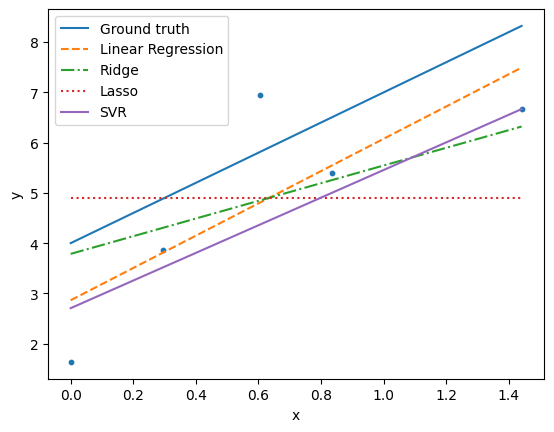

In [ ]:
# print the model prediction
import matplotlib.pyplot as plt
plot_models(x, y, ['Ground truth', 'Linear Regression', 'Ridge', 'Lasso', 'SVR'],
 [[4,3], linReg_coeff, ridge_coeff, lasso_coeff, svr_coeff])

Ridge1, Ridge2, Ridge3 [3.01918014 2.96801593] [3.78653407 1.75886045] [4.68275382 0.34664506]


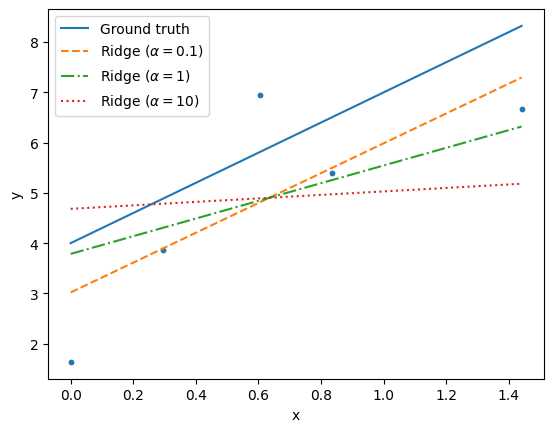

In [ ]:
# train and visualize 3 variations of the ridge model
ridge1, ridge2, ridge3 = Ridge(alpha=0.1).fit(x.reshape(-1,1), y.reshape(-1)), Ridge(alpha=1).fit(x.reshape(-1,1), y.reshape(-1)), Ridge(alpha=10).fit(x.reshape(-1,1), y.reshape(-1))
plot_models(x, y, ['Ground truth', 'Ridge ($\\alpha=0.1$)', 'Ridge ($\\alpha=1$)', 'Ridge ($\\alpha=10$)' ], [[4,3], np.array([ridge1.intercept_, ridge1.coef_[0]]), np.array([ridge2.intercept_, ridge2.coef_[0]]), np.array([ridge3.intercept_, ridge3.coef_[0]])])
print('Ridge1, Ridge2, Ridge3',  np.array([ridge1.intercept_, ridge1.coef_[0]]), np.array([ridge2.intercept_, ridge2.coef_[0]]), np.array([ridge3.intercept_, ridge3.coef_[0]]))

Return to the presentation